# Исследование объявлений о продаже квартир

По техническим характеристикам квартир Санкт-Петербурга и соседних населённых пунктов нужно научиться определять их рыночную стоимость.

Предоставлен архив объявлений о продаже квартир за несколько лет. По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 


Задача — проанализировать данные, изучить зависимости и отдельно исследовать сегмент квартир в центральной части города. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [4]:
import matplotlib.pyplot as plt

import pandas as pd
data = pd.read_csv('datasets/spb_restate.csv')
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()
print('\n')
print('Кол-во дублей = {:.0f}'.format(data.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest   

В данных достаточно много пропусков. Необходимо с каждым из них разобраться.

---


### Шаг 2. Предобработка данных

**Высота потолков** `ceiling_height`

In [6]:
print(data['ceiling_height'].describe())

data.query('ceiling_height <= 2.2 | ceiling_height > 5.0')

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,355,17,3600000.0,55.20,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,464,15,66571000.0,280.30,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,...,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
552,552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
1026,1026,20,155000000.0,310.00,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,...,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,1388,20,59800000.0,399.00,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
2572,2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,3148,14,2900000.0,75.00,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3474,3,1400000.0,30.00,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,...,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4212,4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
4643,4643,0,4300000.0,45.00,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0


Помимо пропусков обнаружились квартиры с высотой потолка 1м и 100м. Определим [высоту потолка от 2.2м до 4.5м](https://www.fontanka.ru/2019/04/10/117/), остальные показатели приравняем к ближайшим границам (2.2м и 4.5м). 
Сделаем выборку пропущеных высот и заменим эти значения на средний показатель.

In [7]:
data.loc[(data['ceiling_height'] < 2.2), 'ceiling_height'] = 2.2
data.loc[(data['ceiling_height'] > 4.5), 'ceiling_height'] = 4.5

In [8]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.729766
std          0.284385
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.500000
Name: ceiling_height, dtype: float64

Теперь можем заменить всю отсутствующую информацию о высоте потолка на среднее значение - 2.729766.

count    23699.000000
mean         2.729857
std          0.222474
min          2.200000
25%          2.600000
50%          2.730000
75%          2.730000
max          4.500000
Name: ceiling_height, dtype: float64


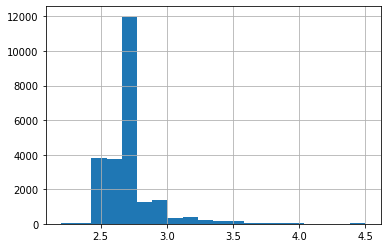

In [9]:
data['ceiling_height'] = (data['ceiling_height'].fillna(data['ceiling_height'].mean(), inplace=False)).round(decimals=2)
print(data['ceiling_height'].describe())

data['ceiling_height'].hist(bins=20)
plt.show()

Так как более 9 тысяч пропусков мы заменили усреднённым значением, гистограмма показывает, что основная масса представленных квартир с высотой потолка 2.7 метров. 


**Количество этажей** `floors_total`

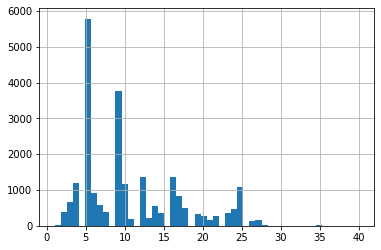

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [10]:
data['floors_total'].value_counts()
data['floors_total'].hist(bins=50, range=(1, 40))
plt.show()
data['floors_total'].describe()

Бросается в глаза более 1000 25 этажных домов, что в масштабах Санкт-Петербурга и соседних населённых пунктов выглядит [неправдоподобно](http://skyscrapers.barneapol.ru). Поэтому возьмём медиану этажности для заполнения отсутствующей информации. 

Значения этажности домов представлено в вещественной форме (float). Переведём этот столбец в целые значения (int).

In [11]:
data['floors_total'] = (data['floors_total'].fillna(data['ceiling_height'].median(), inplace=False))
data['floors_total'] = (data['floors_total']).astype(int)

**Жилая площадь** `living_area`

Для наглядности анализа, предлагаю жилую площадь рассматривать вместе с общей. 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


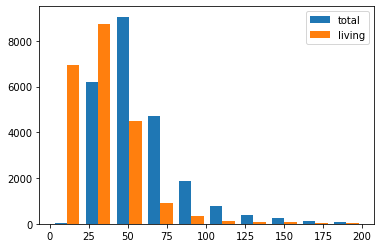

False    23006
True       693
Name: total_area, dtype: int64

In [12]:
print(data['total_area'].describe())
print(data['living_area'].describe())

total = data['total_area'].sort_values()
living = data['living_area'].sort_values()

plt.hist([total, living], bins=10, range=(1, 200), label=['total', 'living'])
plt.legend(loc='upper right')
plt.show()
total = total < 30
total.value_counts()

Так как у нас есть данные общей площади, то можно выяснить приблизительное значения жилой площади пропущенных строк. Для расчета применим планировочный коэффициент К1, который определяется как отношение жилой площади (Sжил.) к общей площади (Sобщ.):
>\begin{equation*}
k_1 = \frac{S_{жил}}{S_{общ}}\
\end{equation*}

Его среднее значение в существующей жилой застройке варируется в пределах: [К1 = 0.5 – 0.7](https://studopedia.ru/3_137449_sravnitelnaya-otsenka-ob-emno-planirovochnih-resheniy-zhilih-zdaniy.html). Применим среднее значение коэффициента (0.6) для заполнения отсутствующих данных.

count    23699.000000
mean        34.741630
std         22.494027
min          2.000000
25%         19.000000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


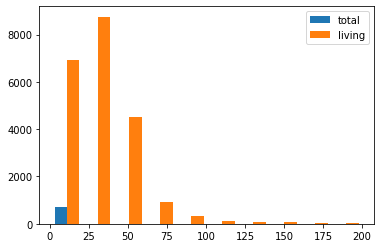

In [13]:
data['living_area'] = (data['living_area'].fillna(data['total_area'] * 0.6, inplace=False))
print(data['living_area'].describe())

plt.hist([total, living], bins=10, range=(1, 200), label=['total', 'living'])
plt.legend(loc='upper right')
plt.show()

Квартиры с жилой площадью до 25м встречаются чаще, чем квартиры с общей площадью этого метража. Это можно проверить. Количество квартир в диапазоне до 25м с жилой площадью в десятки раз больше, чем квартир с аналогичной общей (8153 против 190). С увеличением площади картина меняется. Допустим, в диапазоне от 30 до 70 метров, картина иная. Логика данной (странной на первый взгляд) визуализации следующая - квартир с жилым метражём до 25 метров больше, т.к. у этих квартир общая площадь больше, соответственно эти квартиры на данной гистограмме "находятся" в синих столбцах справа. 

In [14]:
print(data.query('total_area < 25').shape[0])
print(data.query('living_area < 25').shape[0])

print('\n')

print((data.query('total_area > 30 & total_area < 70')).shape[0])
print((data.query('living_area > 30 & living_area < 70')).shape[0])


190
8153


16879
10611


**Аппартаменты** `is_apartment`

Так как это булев тип данных, предположим, что все пропуски это "не аппартаменты", т.е. не относятся к этой категории жилья (*False*).

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

**Площадь кухни** `kitchen_area`

Так как в наших данных есть [квартиры-студии](https://ru.wikipedia.org/wiki/Квартира-студия), предположим, что часть пропусков образовалась за счет того, что в студии как таковой нет выделенной кухни, а соответственно её метраж входит в жилую площадь.

Сделаем отдельную таблицу, чтобы изучить эту гипотезу.


In [16]:
# data['kitchen_area'].describe()
areas = data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']]
print(areas.query('studio==True & kitchen_area=="NaN"'))
areas.info()


       total_area  living_area  kitchen_area  rooms  studio
144         27.00        15.50           NaN      0    True
440         27.11        24.75           NaN      0    True
608         25.00        15.00           NaN      0    True
697         24.10        17.50           NaN      0    True
716         17.00        12.00           NaN      0    True
...           ...          ...           ...    ...     ...
22867       30.00        18.20           NaN      0    True
22877       28.00        18.00           NaN      0    True
23210       26.00        18.00           NaN      0    True
23554       26.00        15.60           NaN      0    True
23637       26.00        17.00           NaN      0    True

[149 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 5 columns):
total_area      23699 non-null float64
living_area     23699 non-null float64
kitchen_area    21421 non-null float64
rooms           23699 non-null 

Гипотеза подтвердилась. Заменим эти пропуски нулями.

>*Кстати, из вышеприведённой таблицы видно, что нулевым количеством комнат определены квартиры-студии.*

In [17]:
data.loc[data['kitchen_area'].isnull() & data['studio'] == True, 'kitchen_area'] = 0


Для заполнения остальных пропусков проанализируем метраж кухонь. У большинства представленных квартир (см.гистограмму) площадь кухонь варируется от 5 до 15 метров. Воспользумся медианой площадей для пропущеных значений. 

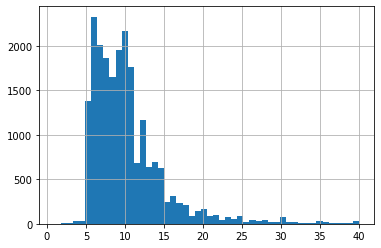

count    21570.000000
mean        10.496794
std          5.949767
min          0.000000
25%          7.000000
50%          9.010000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
6.0     1300
10.0    1262
8.0     1110
9.0     1101
7.0     1062
11.0     797
12.0     662
8.5      415
5.5      400
14.0     381
5.0      358
15.0     351
Name: kitchen_area, dtype: int64


count    18922.000000
mean         9.069812
std          2.558723
min          5.000000
25%          7.000000
50%          9.000000
75%         10.900000
max         15.000000
Name: kitchen_area, dtype: float64

In [18]:
data['kitchen_area'].hist(bins=50, range=(1, 40))
plt.show()
print(data['kitchen_area'].describe())
print(data['kitchen_area'].value_counts().head(12))

square = data.query('kitchen_area >= 5.0 & kitchen_area <=15')
square['kitchen_area'].describe()

In [19]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())


**Балконы** `balcony`

Предположу, что отсутствие данных в этом столбце говорит о том, что в квартире нет балкона. Соответственно, заменим все NaN на 0.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

**Название населённого пункта** `locality_name`

Заменим пропуски на категорию "Другие".

In [21]:
data['locality_name'] = data['locality_name'].fillna('Другие')

**Расстояние до ближайшего аэропорта** `airports_nearest`

В наших данных более 20% пропущенных значений. Необходимо проанализировать имеющиеся расстояния и для заполнения пропусков предлагаю воспользоваться чаще всего встречающимся значением.

Построим гистограмму для визуального анализа расстояния объекта недвижимости от аэропорта и при помощи сводной таблицы изучим более подробно наши данные.

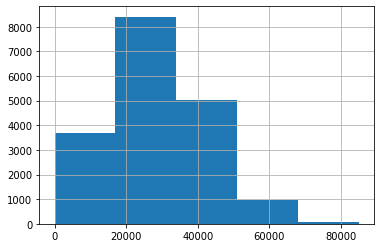

                         airports_nearest
locality_name                            
Другие                              24572
Зеленогорск                         73300
Колпино                             26375
Красное Село                        26595
Кронштадт                           67469
Ломоносов                           48308
Павловск                            21053
Петергоф                            40184
Пушкин                              16447
Санкт-Петербург                     28046
Сестрорецк                          56640
поселок Лисий Нос                   55930
поселок Мурино                      51553
посёлок Александровская             12896
посёлок Белоостров                  57769
посёлок Левашово                    52693
посёлок Лисий Нос                   54988
посёлок Металлострой                25726
посёлок Молодёжное                  84430
посёлок Парголово                   53994
посёлок Песочный                    54565
посёлок Петро-Славянка            

In [22]:
data['airports_nearest'].describe()
data['airports_nearest'].hist(bins=5, range=(0, 85000))
plt.show()

dist_to_airp = data.pivot_table(index=['locality_name'], values='airports_nearest', aggfunc='mean')
print(dist_to_airp.astype(int))

print('\n')

sp = data.query('locality_name == "Санкт-Петербург"')
print(sp['airports_nearest'].describe())

print('\n')

sp_share = len(data.query('locality_name == "Санкт-Петербург"')) / len(data)
print('Доля объектов в Санкт-Петербурге:','{:.1%}'.format(sp_share))

Основная масса объектов находится в пределах 60км от аэропорта. Причем, большая часть недвижимости находится в Санкт-Петербурге (66.3%) и если проанализировать расстояния от Северной столицы до аэропорта, то среднее значение - 28км, а максимальное ~ 55км (проверено по Яндекс-карте). А в наших данных представлено достаточно много населённых пунктов с усреднённым расстояниям более 30км.  Поэтому, для заполнения пропусков, предлагаю воспользоваться наиболее часто встречающимся расстоянием в наших данных, т.к оно будет более правдиво отражать действительность для дальнейшего анализа предоставленных данных. 

0    37434.0
dtype: float64




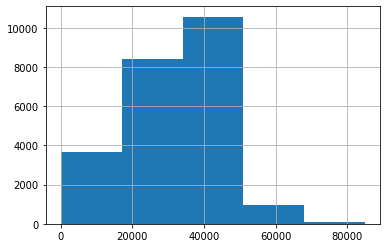

In [23]:
print(data['airports_nearest'].mode())

print('\n')

data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].value_counts().index[0])

data['airports_nearest'].hist(bins=5, range=(0, 85000))
plt.show()

**Расстояние до центра города** `cityCenters_nearest`


Для начала попробуем заполнить пропуски медианой по сгруппированным населённым пунктам.

In [24]:
data['cityCenters_nearest'] = data.groupby(data['locality_name'])['cityCenters_nearest'].transform(lambda x: x.fillna(x.median()))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int32
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        18181 non-null float64
parks_nearest      

Всего 133 значения было заполнено медианой, т.к. остальные населённые пункты вообще не имеют ни одного значения. В нашем исследовании это важный показатель, а пропусков много и их нельзя заменить усреднённым значением (т.к. расстояния варируются от 15 до 200км), придется (на благо DS))) поработать руками.

Определим те населённые пункты по которым вообще нет значения в столбце `cityCenters_nearest`.


In [25]:
dist = data.query('cityCenters_nearest == "NaN"')
print(dist['locality_name'].value_counts().head(20))

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Тосно                      104
Кингисепп                  104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
посёлок Бугры               69
Приозерск                   66
Name: locality_name, dtype: int64


Заменим 14 пропусков на расстояния от населённого пункта до центра Санкт-Петербурга (Невский пр-т). Данные из Яндекс-карты. Остальные пропуски по этим населённым пунктам теперь мы сможем заполнить медианой.

In [26]:
data.loc[data['locality_name']=='посёлок Мурино', 'cityCenters_nearest'] = 23000
data.loc[data['locality_name']=='Всеволожск', 'cityCenters_nearest'] = 25000
data.loc[data['locality_name']=='Гатчина', 'cityCenters_nearest'] = 47000
data.loc[data['locality_name']=='деревня Кудрово', 'cityCenters_nearest'] = 15000
data.loc[data['locality_name']=='Выборг', 'cityCenters_nearest'] = 140000
data.loc[data['locality_name']=='Кудрово', 'cityCenters_nearest'] = 15000
data.loc[data['locality_name']=='деревня Новое Девяткино', 'cityCenters_nearest'] = 22000
data.loc[data['locality_name']=='Сертолово', 'cityCenters_nearest'] = 30000
data.loc[data['locality_name']=='Кириши', 'cityCenters_nearest'] = 160000
data.loc[data['locality_name']=='Сланцы', 'cityCenters_nearest'] = 200000
data.loc[data['locality_name']=='Волхов', 'cityCenters_nearest'] = 130000
data.loc[data['locality_name']=='Тосно', 'cityCenters_nearest'] = 56000
data.loc[data['locality_name']=='Кингисепп', 'cityCenters_nearest'] = 130000
data.loc[data['locality_name']=='Никольское', 'cityCenters_nearest'] = 45000

data['cityCenters_nearest'] = data.groupby(data['locality_name'])['cityCenters_nearest'].transform(lambda x: x.fillna(x.median()))

**Число парков в радиусе 3 км** `parks_around3000`

**Число водоёмов в радиусе 3 км** `ponds_around3000`

В информации по этим столбцам просматривается зависимость - по всем паркам указаны значения по водоёмам. Думаю, не ошибусь, если все пропуски заполню нулевыми значениями.

In [27]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Расстояние до ближайшего парка** `parks_nearest`

**Расстояние до ближайшего водоёма** `ponds_nearest`

Думаю, не ошибусь, если пропущенные значения означают, что рядом парка или пруда нет.

In [28]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

---

### Шаг 3. Посчитайте и добавьте в таблицу

**Дата публикации** `first_day_exposition`

**Сколько дней было размещено объявление** `days_exposition`

In [29]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d', dayfirst = True)

data['date_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT', dayfirst = True)

data['weekday'] = data['date_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['date_exposition']).month
data['year'] = pd.DatetimeIndex(data['date_exposition']).year
data.head()


,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_exposition,weekday,month,year
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,16028.0,1.0,482.0,2.0,755.0,NaN,2019-03-07,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,2.73,11,18.6,1,...,18603.0,0.0,0.0,0.0,0.0,81.0,2018-12-04,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,2.73,5,34.3,4,...,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,2.73,14,95.4,9,...,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19,1,6,2018


**Добавим столбец с ценой квадратного метра**

In [30]:
data['price_p_m2'] = (data['last_price'] / data['total_area']).astype('int')

**Добавим этаж квартиры (первый, последний, другой)**

In [31]:
def fl_cat(row):
    fl = row['floor']
    tot = row['floors_total']
    if fl == 1:
        return ('первый')
    if fl == tot:
        return ('последний')
    return ('другой')
    
data['floor_cat'] = data.apply(fl_cat, axis=1)
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_exposition,weekday,month,year,price_p_m2,floor_cat
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,482.0,2.0,755.0,NaN,2019-03-07,3,3,2019,120370,другой
1,1,7,3350000.0,40.4,2018-12-04,1,2.73,11,18.6,1,...,0.0,0.0,0.0,81.0,2018-12-04,1,12,2018,82920,первый
2,2,10,5196000.0,56.0,2015-08-20,2,2.73,5,34.3,4,...,90.0,2.0,574.0,558.0,2015-08-20,3,8,2015,92785,другой
3,3,0,64900000.0,159.0,2015-07-24,3,2.73,14,95.4,9,...,84.0,3.0,234.0,424.0,2015-07-24,4,7,2015,408176,другой
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,112.0,1.0,48.0,121.0,2018-06-19,1,6,2018,100000,другой


**Добавим столбцы с соотношением жилой и общей площади, а также отношение площади кухни к общей.**

In [32]:
data['livetot_rate'] = (data['living_area'] / data['total_area']).round(2)
data['kitchentot_rate'] = (data['kitchen_area'] / data['total_area']).round(2)

---

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Изучение параметров: площадь, цена, число комнат, высота потолков.**

In [33]:
vol_tab_all = data[['total_area', 'rooms', 'ceiling_height', 'last_price', 'price_p_m2']]
vol_tab_all

,total_area,rooms,ceiling_height,last_price,price_p_m2
0,108.00,3,2.70,13000000.0,120370
1,40.40,1,2.73,3350000.0,82920
2,56.00,2,2.73,5196000.0,92785
3,159.00,3,2.73,64900000.0,408176
4,100.00,2,3.03,10000000.0,100000
...,...,...,...,...,...
23694,133.81,3,3.70,9700000.0,72490
23695,59.00,3,2.73,3100000.0,52542
23696,56.70,2,2.73,2500000.0,44091
23697,76.75,2,3.00,11475000.0,149511


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

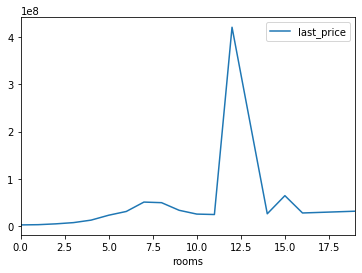

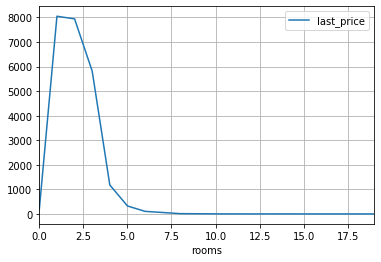

In [34]:
price_df = vol_tab_all[[x for x in vol_tab_all.columns if 'last_price' in x] + ['rooms']]
price_df.groupby('rooms').mean().plot()
price_df.groupby('rooms').count().plot(grid=True)
vol_tab_all['rooms'].value_counts()

Основное количество квартир с числом комнат до 4-х, более 7 комнат встречается редко. 

В нашей выборке присутствуют квартиры с количеством комнат до 15, причем, есть одна 900 метровая 12-ти комнатная квартира квартира за 420млн. (по всем признакам, это эксклюзив рядом с центром). Так как таких квартир (более 7 комнат и *средней* общей площадью более 300 кв.метров) немного и они, как видно из гистограммы, не отражают массовый рынок недвижимости, предлагаю ограничить нашу выборку количеством комнат до 7. 

In [35]:
pd.set_option('display.max_columns', None) #чтоб увидеть все столбцы

vol_tab = (vol_tab_all[vol_tab_all['rooms'] <= 7]).sort_values('total_area')
vol_tab

,total_area,rooms,ceiling_height,last_price,price_p_m2
19904,12.0,1,2.55,2400000.0,200000
17961,13.0,1,2.60,1400000.0,107692
19546,13.0,1,3.40,1850000.0,142307
19807,13.0,1,2.73,3800000.0,292307
19558,13.2,1,2.73,1686000.0,127727
...,...,...,...,...,...
8018,507.0,5,4.45,84000000.0,165680
4237,517.0,7,2.73,50000000.0,96711
15651,618.0,7,3.40,300000000.0,485436
3117,631.0,7,2.73,140000000.0,221870


Проанализируем зависимость стоимости квартиры от количества комнат.

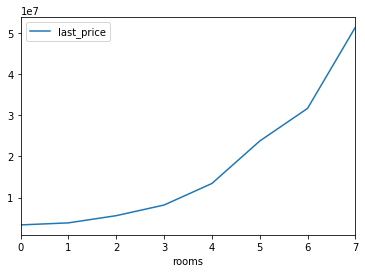

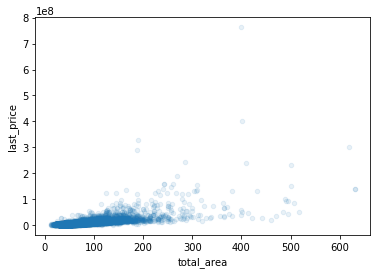

In [36]:
price_r = vol_tab[[x for x in vol_tab.columns if 'last_price' in x] + ['rooms']]
price_r.groupby('rooms').mean().plot()

vol_tab.plot(x='total_area', y='last_price', kind='scatter',alpha=0.1)

In [37]:
vol_tab[vol_tab['total_area'] >= 400]

price_400m = data[data['last_price'] == 763000000]
price_400m

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_exposition,weekday,month,year,price_p_m2,floor_cat,livetot_rate,kitchentot_rate
12971,12971,19,763000000.0,400.0,2017-09-30,7,2.73,10,250.0,10,False,False,False,9.01,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,2017-09-30,5,9,2017,1907500,последний,0.62,0.02


При анализе зависимости стоимости от площади, обнаружился один нехарактерный выброс по цене. Гипотеза о том, что это скорее всего эксклюзивная квартира в центре города подтверждается анализом этой строчки (квартира находится рядом с центром, пентхаус рядом с парком). 

В остальном же, чем больше метраж, тем выше стоимость. Основное предложение по площади до 200 метров и ценой до 60 млн. Ограничим выборку для более подробного изучения этого сегмента. 

In [38]:
pop_flats = vol_tab.query('total_area < 200 and last_price < 60000000')
pop_flats['last_price'].describe().astype(int)

count       23432
mean      5897853
std       4812881
min         12190
25%       3400000
50%       4600000
75%       6680250
max      59534892
Name: last_price, dtype: int32

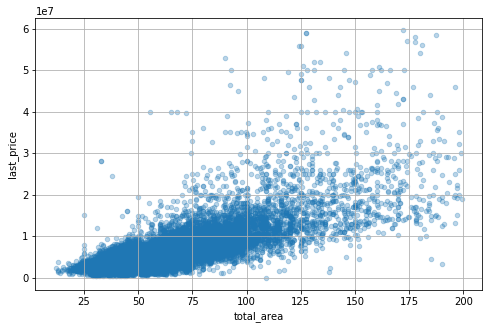

In [39]:
pop_flats.plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 5), sharex=False, grid=True, alpha=0.3)

На этой гистограмме отчетливо видно, что основное предложение квартир от 20 до 125 метров стоимостью до 30млн.

**Влияние высоты потолка на стоимость квартиры**

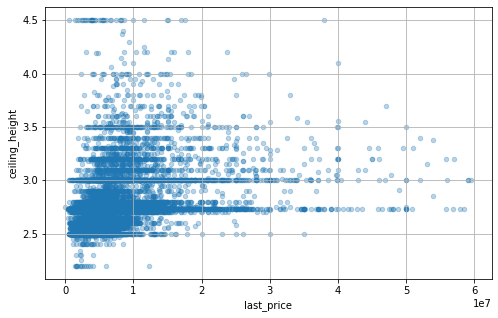

In [40]:
pop_flats.plot(x='last_price', y='ceiling_height', kind='scatter', figsize=(8, 5), sharex=False, grid=True, alpha=0.3)

На гистограмме видно, что основная масса квартир с высотой потолка от 2.5м до 3.5м., причем, этот параметр влияет на цену квартиры (чем выше "облако", тем больше его клонит вправо). Сконцентрируем нашу выборку на популярныых квартирах.

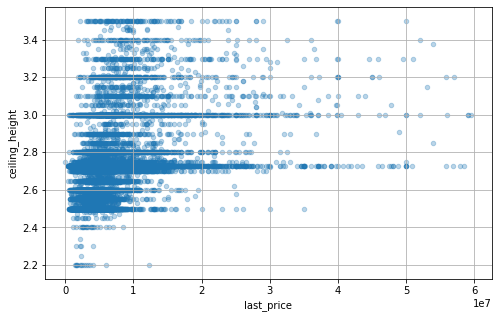

In [41]:
pop_ceiling = pop_flats.query('ceiling_height <= 3.5')
pop_ceiling['ceiling_height'].describe()

pop_ceiling.plot(x='last_price', y='ceiling_height', kind='scatter', figsize=(8, 5), sharex=False, grid=True, alpha=0.3)

В целом наблюдается незначительное увеличение цены квартиры с увеличением высоты потолка. Большая часть квартир с высотой потолка от 2.5м до 3.0м.

---

**Время продажи квартиры**

Нельзя заполнить пропущенные значения, т.к. нет полной уверенности в том, продалась квартира или нет на момент выгрузки наших данных. Предположу, что квартира находилась в процессе продажи, поэтому на момент выгрузки и нет данных. Поэтому не будем принимать в учет эти строки при анализе скорости продажи. 

In [42]:
close_deal = data.dropna(subset=['days_exposition'])

close_deal
print(close_deal['days_exposition'].describe())
print(close_deal['days_exposition'].value_counts())

close_deal.groupby(['days_exposition']).size()
grouped_cd = close_deal.groupby(['days_exposition']).size().reset_index(name='counts')
grouped_cd.head()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64


,days_exposition,counts
0,1.0,1
1,2.0,3
2,3.0,158
3,4.0,176
4,5.0,152


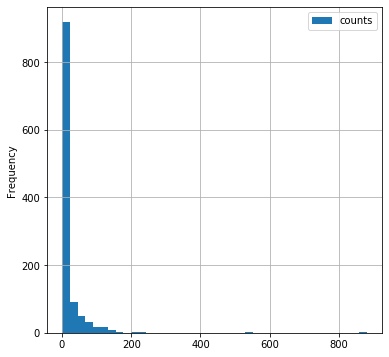

In [43]:
grouped_cd.plot(x='days_exposition', y='counts', kind='hist', bins=40, figsize=(6, 6), sharex=False, grid=True)

И по графику, и по усреднённому сроку экспозиции объявления (среднее - 180 дней, хотя медианное значение - 95 дней) видно, что в основном квартиры продаются в срок до 180 дней. Однако, чаще всего объявления снимаются с публикации за 2 месяца. Поэтому, можно считать, что очень быстрая сделка - до 45 дней, необычно долгая - свыше 180 дней.

**Факторы, влияющие на стоимость квартиры**



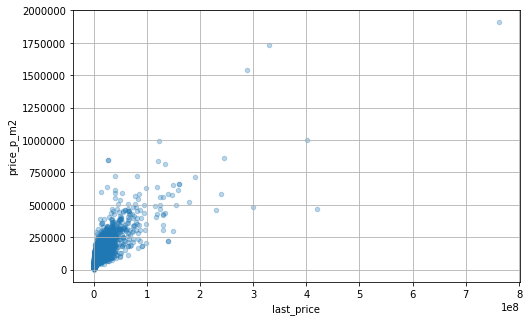

In [44]:
price = data[['last_price', 'price_p_m2']]
price.sort_values('last_price').plot(x='last_price', y='price_p_m2', kind='scatter', figsize=(8, 5), sharex=False, grid=True, alpha=0.3)

Гистограмма наглядно показывает, что основное предложение квартир до 100млн. и ценой за квадратный метр до 500тыс.

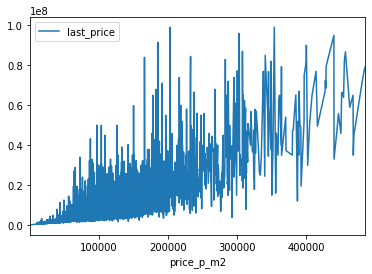

In [45]:
price_pm2 = price.pivot_table(index='price_p_m2',values='last_price', aggfunc='mean')
pop_pp = price_pm2.query('price_p_m2 < 500000 and last_price < 100000000')
pop_pp.plot()

Хотя есть исключения, связанные с расположением и качеством продаваемого объекта (об этом говорит неоднородность гистограммы с характерными пиками графика), в целомом, тенденция отношения стоимости квартиры к цене квадратного метра - чем выше стоимость, тем дороже 1 кв.м (график стремится вверх). 

Изучим как количество комнат влияет на среднюю стоимость недвижимости и на цену квадратного метра.

rooms
0     3337724
1     3835361
2     5591604
3     8179118
4    13423497
5    23762082
6    31709751
7    51470069
Name: last_price, dtype: int32


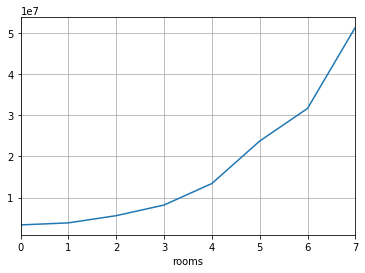

In [46]:

floor_pr = vol_tab.groupby('rooms')['last_price'].mean().astype(int)
floor_pr_m = vol_tab.groupby('rooms')['last_price'].median().astype(int)
floor_pr.plot(grid=True)
print(floor_pr)
# floor_pr_m

count         8.000000
mean     117916.875000
std       24067.434497
min       95489.000000
25%       99900.250000
50%      109421.500000
75%      130241.250000
max      163569.000000
Name: price_p_m2, dtype: float64

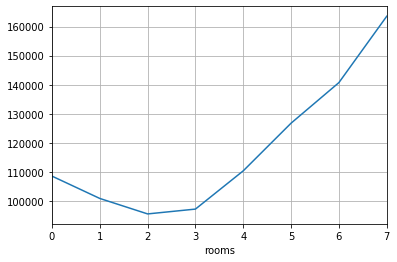

In [47]:
floor_pm2 = vol_tab.groupby('rooms')['price_p_m2'].mean().astype(int)
# floor_pr_m = vol_tab.groupby('rooms')['last_price'].median().astype(int)
floor_pm2.plot(grid=True)
floor_pm2.describe()

Предсказуемо, чем больше комнат тем дороже квартира. Однако, цена 1 квадратного метра самая низкая у 2-х комнатных квартир, а квадратный метр однокомнатной квартиры дороже метра 3-х комнатной квартиры. Интересно, что стоимость 1кв.м. квартир-студий (0 комнат) практически такая же как и у 4-х комнатных квартир. Начиная с 2-х комнатных квартир, чем больше комнат, тем дороже цена 1кв.м. Предположу, что многокомнатные квартиры в основном представляют премиум сегмент рынка недвижимости, поэтому и цена квадратного метра выше.

---

Рассмотрим как удаленность от центра города влияет на стоимость квартиры. Для этого категоризируем расстояния да центра города. Воспользуемся картой Яндекс для определения групп. Для анализа стоимости восспользуемся усреднённым значением для этой категории удалённости.

In [48]:
data['cityCenters_nearest'].describe()

count     21184.000000
mean      20062.995893
std       26183.869526
min         181.000000
25%       10326.000000
50%       14152.000000
75%       19143.000000
max      200000.000000
Name: cityCenters_nearest, dtype: float64

downtown_dist
далеко         2597403
пригород       4447122
окраина        4927738
внутри КАД     7507992
центр         14937188
Name: last_price, dtype: int32


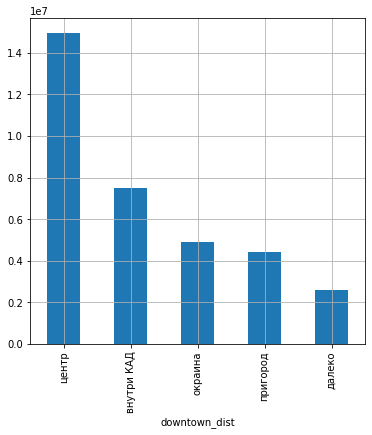

In [49]:
def dt_dist(row):
    dist = row['cityCenters_nearest']
    if dist <= 5000:
        return 'центр'
    if dist <= 15000:
        return 'внутри КАД'
    if dist <= 26000:
        return 'окраина'
    if dist <= 50000:
        return 'пригород'
    return 'далеко'
    
data['downtown_dist'] = data.apply(dt_dist, axis=1)
data.head()

dtdist_pr = data.groupby('downtown_dist')['last_price'].mean().astype(int)
print(dtdist_pr.sort_values())

dtdist_pr.sort_values(ascending = False).plot(kind='bar', figsize=(6, 6), sharex=False, grid=True)
# plt.show()
# dtdist_pr.sort_values(ascending = False).plot(grid=True)

Не удивительно! Чем ближе к центру, тем дороже недвижимость. Причем, средняя стоимость квартир в центре (в 5-ти километровом радиусе) практически в 2 раза выше, чем средняя стоимость "внутри КАД" (удалённость от центра до 15км). Далее стоимость падает, но не так резко.

---

Проанализируем каким образом влияет на стоимость квартиры первые и последние этажи. Для этого воспользуемся уже проведённой категоризацией `floor_cat`. 

floor_cat
первый       4803560
другой       6675627
последний    7359658
Name: last_price, dtype: int32


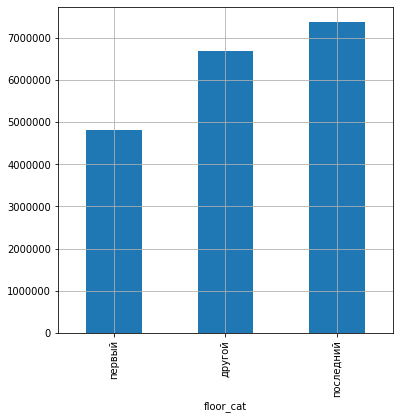

In [50]:
flcat_pr = data.groupby('floor_cat')['last_price'].mean().astype(int)
print(flcat_pr.sort_values())
flcat_pr.sort_values().plot(kind='bar', figsize=(6, 6), sharex=False, grid=True)
# plt.show()
# flcat_pr.sort_values().plot(grid=True)

Первый этаж самый дешевый. Последний самый дорогой, это обусловлено тем, что зачастую квартиры на последних этажах представляют из себя пентхаус и их стоимость выше.

---

Проверим влияет ли дата размещения (день недели, месяц и год) на стоимость квартиры.

weekday
6    6246180
4    6372130
1    6394233
0    6511613
2    6627970
3    6708663
5    6976803
Name: last_price, dtype: int32


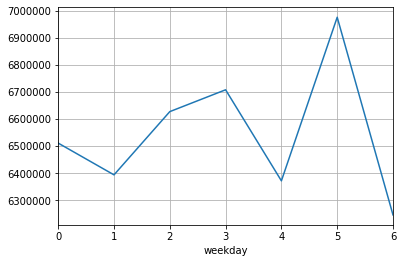

month
10    6235013
6     6310269
8     6350232
3     6359275
11    6461362
2     6468500
5     6600435
7     6649337
1     6668233
4     6737198
9     6825470
12    7011731
Name: last_price, dtype: int32


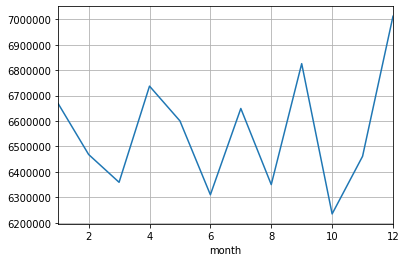

year
2018     5950966
2017     6585729
2019     6782388
2016     6827912
2015     8572833
2014    12087135
Name: last_price, dtype: int32


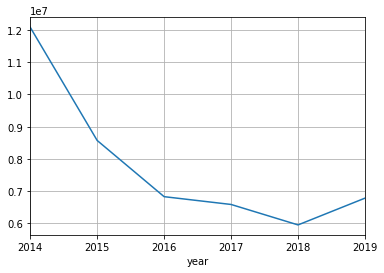

In [51]:
weekday_inf = data.groupby('weekday')['last_price'].mean().astype(int)
print(weekday_inf.sort_values())
weekday_inf.plot(grid=True)
plt.show()

month_inf= data.groupby('month')['last_price'].mean().astype(int)
print(month_inf.sort_values())
month_inf.plot(grid=True)
plt.show()

year_inf = data.groupby('year')['last_price'].mean().astype(int)
print(year_inf.sort_values())
year_inf.plot(grid=True)

Итак:

- опубликованные по субботам (5) квартиры в среднем самые дорогие, в то время как, опубликованные по воскресеньям - самые дешёвые (разница в 10.5%). В остальные дни недели цена меняется в пределах 5%;
- опубликованные в декабре квартиры в среднем самые дорогие, в октябре - самые дешевые. Разница - 11%;
- последний график, на мой взгляд, самый важный. С 2014 года стоимость квартир падала вплоть до 2018 года, причем, по крутизне линии видно, что до 2016 года стоимость падала сильно (практически в 2 раза), затем падение замедлилось и начиная с 2019 года стоимость начала расти.

**10 населённых пунктов с наибольшим числом объявлений**

Определим населённые пункты с наибольшим числом публикаций, посчитаем среднюю стоимость объекта и цену квадратного метра. 

In [52]:
city_high = (data.groupby(['locality_name']).agg({'last_price': ['mean'], 'price_p_m2': ['mean', 'count']})).astype(int)
city_high = pd.DataFrame(city_high)
city_high.reset_index(inplace = True)
city_high.columns = ['place', 'value_m', 'price_m2', 'qty']

print(city_high.sort_values('value_m', ascending=False).head(10))
print('\n')
print(city_high.sort_values('price_m2', ascending=False).head(10))

city_high.sort_values('qty', ascending=False).head(10)

                       place   value_m  price_m2    qty
310           посёлок Репино  12166854    104238      4
156         деревня Хязельки  11000000     47826      1
68               деревня Бор  10397600     59348      2
270  посёлок Александровская   8725000     70262      2
34           Санкт-Петербург   8062507    114848  15721
7                     Другие   6745167     94309     49
33                    Пушкин   6469035    103125    369
37                Сестрорецк   6341722    101757    183
8                Зеленогорск   6288337    115122     24
287        посёлок Лисий Нос   5027500    121615      2


                 place   value_m  price_m2    qty
287  посёлок Лисий Нос   5027500    121615      2
8          Зеленогорск   6288337    115122     24
34     Санкт-Петербург   8062507    114848  15721
310     посёлок Репино  12166854    104238      4
33              Пушкин   6469035    103125    369
37          Сестрорецк   6341722    101757    183
18             Кудрово   4573916

,place,value_m,price_m2,qty
34,Санкт-Петербург,8062507,114848,15721
292,посёлок Мурино,3672049,85751,522
327,посёлок Шушары,4108081,78676,440
3,Всеволожск,3789067,68654,398
33,Пушкин,6469035,103125,369
14,Колпино,3964021,75424,338
297,посёлок Парголово,4488074,90175,327
6,Гатчина,3488336,68745,307
94,деревня Кудрово,4234157,92473,299
4,Выборг,3250983,58141,237


Основная масса объявлений о продаже недвижимости в Санкт-Петербурге и хотя средняя стоимость квартир в столице не самая высокая, однако средняя цена квадратного метра одна из самых высоких. 

По цене квадратного метра лидером оказался посёлок Лисий Нос - старое дачное место на северном берегу Финского залива (кстати, среди дачников был и русский художник Иван Шишкин), на сегодняшний день - одно из элитных мест.   

Допустим, в поселке Репино средняя стоимость в 1.5 раза выше! Но это объясняется тем, что эта недвижимость находится в [Питерской «Рублевке»](https://www.forbes.ru/forbes/issue/2009-05/6955-zolotoi-treugolnik). 

> *Торговцы загородной недвижимостью называют поселки **Репино**, Комарово и Солнечное, расположенные внутри административных границ Петербурга, «золотым треугольником». Конечно, состоятельные петербуржцы отдыхают от городской суматохи не только тут. Богатых домов хватает и в районе Выборга, и на Карельском перешейке, но заросший зеленью Курортный район, откуда по Приморскому шоссе можно за 40 минут домчаться до центра Петербурга, вне конкуренции. Неудивительно, что и земля здесь самая дорогая на всем российском Северо-Западе.*

В г.Пушкине стоимость квартир на 20% ниже Питерской. Самые низкие цены в нашей десятке в Выборге и Гатчине.

---
#### Дополнительное задание  
*Создать столбец с расстоянием до центра в километрах(округление до целых значений). Посчитать среднюю цену для каждого километра. Построть график, показывающий, зависимость цены от удалённости от центра. Определить границу центральной территории города.*

---

,dist_to_dt,counts,price_mean,price_m2_mean
0,0,27,31449115,245833
1,1,192,21206720,177004
2,2,310,17788319,157848
3,3,350,11126581,121386
4,4,688,13304279,133282
5,5,920,14499121,140509
6,6,618,15338418,151011
7,7,420,14775152,156176
8,8,597,9957716,125671
9,9,593,6950658,113130


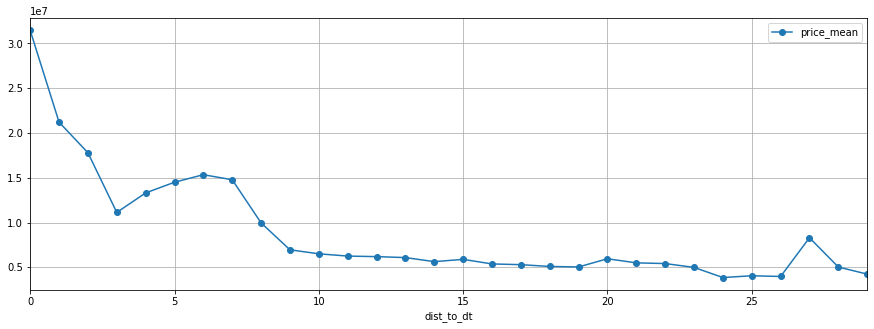

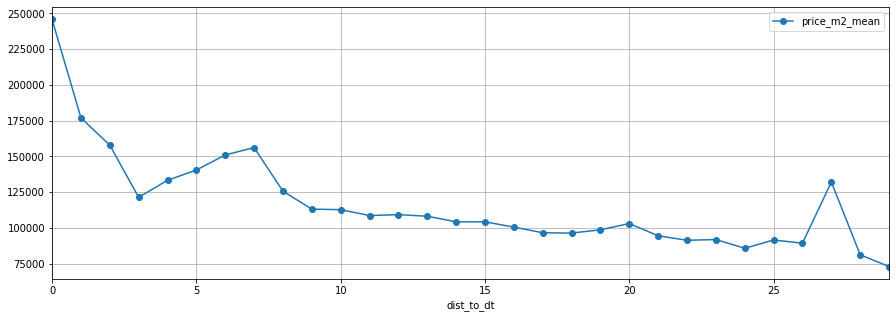

In [53]:
data['dist_to_dt'] = (data['cityCenters_nearest'] / 1000).round(0)
data['dist_to_dt'].value_counts().head(0)
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb
km = data_spb.groupby(['dist_to_dt'])
counts = km.size().to_frame(name='counts')
km_all = (counts.join(km.agg({'last_price': 'mean'}).rename(columns={'last_price': 'price_mean'}))
.join(km.agg({'price_p_m2': 'mean'}).rename(columns={'price_p_m2': 'price_m2_mean'}))
.reset_index()).astype(int)

km_all.plot(x='dist_to_dt', y='price_mean', style='o-',grid=True, figsize=(15, 5))
km_all.plot(x='dist_to_dt', y='price_m2_mean', style='o-',grid=True, figsize=(15, 5))

km_all

Судя по графикам, центральная зона города в радиусе 7км. Всплеск на 27км связан скорее всего с несколькими дорогими элитными объектами на окраине города. 

---

**Выделим сегмент квартир в центральной зоне (в радиусе до 7км) и проанализируем эту территорию.**

Изучим влияние общей площади на формирование цены, сгруппировав объекты по количеству комнат.

Так как в центральной зоне достаточно большой разброс квартир по площади (от 44 до 590 квадратных метров) и по количеству комнат, определим наиболее часто встречающийся для этой зоны метраж и ограничим нашу выборку количеством комнат. Среднее значение площади 217, медианное 219 метров; более 7 комнат - единичные предложения.  Для определения влияния близости объекта к центру на стоимость, ограничим нашу выборку площадью до 220 метров и количеством комнат до 7. 


In [54]:
downtown_7km = data.query('dist_to_dt <= 7')
downtown_7km

stat_7km = downtown_7km.groupby(['rooms'])
stat = stat_7km.size().to_frame(name='quantity')
spb_7km = (stat.join(stat_7km.agg({'last_price': 'mean'}).astype(int).rename(columns={'last_price': 'price_mean'}))
.join(stat_7km.agg({'price_p_m2': 'mean'}).astype(int).rename(columns={'price_p_m2': 'm2_mean'}))
.join(stat_7km.agg({'total_area': 'mean'}).astype(int).rename(columns={'total_area': 'area_mean'}))
.join(stat_7km.agg({'floor': 'mean'}).astype(int).rename(columns={'floor': 'floor_mean'})) 
.join(stat_7km.agg({'ceiling_height': 'mean'}).round(decimals=1).rename(columns={'ceiling_height': 'ceiling_mean'}))
.join(stat_7km.agg({'cityCenters_nearest': 'mean'}).astype(int).rename(columns={'cityCenters_nearest': 'to_dt_m'}))
.join(stat_7km.agg({'livetot_rate': 'mean'}).rename(columns={'livetot_rate': 'livetot_m'}))
.join(stat_7km.agg({'weekday': 'mean'}).round())
.join(stat_7km.agg({'month': 'mean'}).round(0))
.reset_index())#.astype(int)
spb_7km

print(spb_7km['area_mean'].describe())

print('\n')

spb_7km_220_7 = spb_7km.query('area_mean <= 220 & rooms <= 7')
print(spb_7km_220_7.sort_values('to_dt_m'))

print('\n')

spb_7km.sort_values('to_dt_m')

count     16.000000
mean     217.437500
std      138.037178
min       44.000000
25%      115.750000
50%      219.500000
75%      262.500000
max      590.000000
Name: area_mean, dtype: float64


   rooms  quantity  price_mean  m2_mean  area_mean  floor_mean  ceiling_mean  \
5      5       217    28735713   145454        169           3           3.2   
6      6        83    35273085   153806        200           3           3.2   
4      4       493    19530810   141422        123           4           3.0   
3      3      1100    14801299   143733         94           4           3.0   
2      2      1036     9823715   141724         65           4           2.9   
0      0        17     9023823   145108         56           3           3.0   
1      1       520     6842371   153895         44           4           2.8   

   to_dt_m  livetot_m  weekday  month  
5     3913   0.648940      3.0    6.0  
6     3995   0.669518      2.0    6.0  
4     4146   0.635152      3.0    6.0  
3    

,rooms,quantity,price_mean,m2_mean,area_mean,floor_mean,ceiling_mean,to_dt_m,livetot_m,weekday,month
12,14,1,28659000,116784,245,2,2.7,2054,0.690000,3.0,3.0
11,11,2,25250000,132639,188,4,3.4,2081,0.710000,4.0,4.0
15,19,1,32250000,86091,374,2,2.7,3574,0.710000,5.0,6.0
8,8,10,49779000,192736,239,3,3.1,3712,0.708000,2.0,6.0
5,5,217,28735713,145454,169,3,3.2,3913,0.648940,3.0,6.0
6,6,83,35273085,153806,200,3,3.2,3995,0.669518,2.0,6.0
7,7,54,51994259,167223,260,4,3.2,4057,0.655741,2.0,7.0
14,16,1,28500000,105555,270,4,3.0,4142,0.670000,0.0,3.0
4,4,493,19530810,141422,123,4,3.0,4146,0.635152,3.0,6.0
9,9,3,44666666,130529,309,2,2.9,4307,0.663333,3.0,4.0


Для анализа всех объявлений по Санкт-Петербургу и соседних населённых пунктов сделаем аналогичную группировку. Определим наиболее часто встречающийся для всех объектов метраж и  количество комнат. Разброс по площади (от 29 до 900 квадратных метров), среднее значение площади 257.7, медианное 259 метров; более 8 комнат - единичные предложения. Для определения влияния близости объекта к центру на стоимость, ограничим нашу выборку площадью до 260 метров и количеством комнат до 8. 

In [55]:
stat_data = data.groupby(['rooms'])
stat_all = stat_data.size().to_frame(name='quantity')
spb_all = (stat_all.join(stat_data.agg({'last_price': 'mean'}).astype(int).rename(columns={'last_price': 'price_mean'}))
.join(stat_data.agg({'total_area': 'mean'}).astype(int).rename(columns={'total_area': 'area_mean'}))
.join(stat_data.agg({'floor': 'mean'}).astype(int).rename(columns={'floor': 'floor_mean'})) 
.join(stat_data.agg({'ceiling_height': 'mean'}).round(decimals=1).rename(columns={'ceiling_height': 'ceiling_mean'}))
.join(stat_data.agg({'cityCenters_nearest': 'mean'}).astype(int).rename(columns={'cityCenters_nearest': 'to_dt_m'}))
.join(stat_data.agg({'livetot_rate': 'mean'}).rename(columns={'livetot_rate': 'livetot_m'}))
.join(stat_data.agg({'weekday': 'mean'}).round())
.join(stat_data.agg({'month': 'mean'}).round(0))
.reset_index())#.astype(int)
spb_all

print(spb_all['area_mean'].describe())

print('\n')

spb_all_260_8 = spb_all.query('area_mean <= 260 & rooms <= 8')
print(spb_all_260_8.sort_values('to_dt_m'))

print('\n')

spb_all.sort_values('to_dt_m')

count     17.000000
mean     257.705882
std      217.366846
min       29.000000
25%      107.000000
50%      259.000000
75%      304.000000
max      900.000000
Name: area_mean, dtype: float64


   rooms  quantity  price_mean  area_mean  floor_mean  ceiling_mean  to_dt_m  \
6      6       105    31709751        201           4           3.1     6463   
8      8        12    50224166        259           3           3.1     6594   
5      5       326    23762082        161           4           3.0    10277   
4      4      1180    13423497        107           4           2.8    14275   
0      0       197     3337724         29           8           2.8    17000   
3      3      5814     8179118         77           5           2.7    19414   
1      1      8047     3835361         37           6           2.7    21016   
2      2      7940     5591604         55           5           2.7    21413   

   livetot_m  weekday  month  
6   0.664762      2.0    6.0  
8   0.667500      2.0  

,rooms,quantity,price_mean,area_mean,floor_mean,ceiling_mean,to_dt_m,livetot_m,weekday,month
11,11,2,25250000,188,4,3.4,2081,0.710000,4.0,4.0
16,19,1,32250000,374,2,2.7,3574,0.710000,5.0,6.0
15,16,1,28500000,270,4,3.0,4142,0.670000,0.0,3.0
14,15,1,65000000,590,3,3.5,4666,0.690000,3.0,2.0
13,14,2,26829500,304,3,2.9,5002,0.650000,4.0,8.0
7,7,59,51470069,265,4,3.2,5336,0.652881,2.0,7.0
6,6,105,31709751,201,4,3.1,6463,0.664762,2.0,6.0
8,8,12,50224166,259,3,3.1,6594,0.667500,2.0,6.0
10,10,3,26166666,259,5,3.3,7340,0.646667,1.0,5.0
12,12,1,420000000,900,25,2.8,7877,0.460000,2.0,12.0


**Проанализировав данные по *центральной зоне* города (в радиусе 7км), можно сделать следующие выводы:**

- в целом, чем ближе к "0" отметке центра, тем дороже стоимость квартиры, что нельзя утверждать относительно цены квадратного метра (она варируется и мало зависит от близости к центру);
- максимальная стоимость квартир в 4.5 километровом радиусе; 
- значительное влияние площади объекта на стоимость - чем больше, тем дороже;
- чем ближе ;
- больше всего представлено (в порядке убывания) 3-х, 2-х и 4-х комнатных квартир метражем до 125м.; 
- практически нет квартир_студий.

__Сравнение общих данных с центральной зоной.__

Общее:

- чем больше, тем дороже;
- чем ближе к центру, тем дороже;
- в однокомнатных квартирах наименьший коэффициент жилой площади к общей - ниже 0.5, означающий, что больше половины общей площади занято кухней, с/у и коридором; 
- мало предложений по квартирам-студиям;


Отличия:

- в основном представлены 1, 2-х квартиры общей площадью до 80м., в то время как в центральной зоне 3-х и 2-х комнатные;
- если в центральной зоне (среднее) значение этажности до 3, то основная масса предложений уже на более высоких этажах;
- средняя высота потолка в центральной зоны выше, чем в общей массе предложений.

На мой взгляд, нет особой зависимости цены от даты размещения объявлений.


### Шаг 5. Общий вывод

- чем ближе к центру города, тем выше стоимость квартир;
- массовый рынок в основном представлен 1, 2 и 3-х комнатными квартирами;
- чем больше метраж, тем выше стоимость квартиры;
- чаще всего на рынке недвижимости встречаются квартиры от 20 до 125 метров стоимостью до 30млн.руб.;
- высота потолка незначительно, но влияет на стоимость квартиры (выше, дороже);
- цена квадратного метра квартиры-студии выше, чем у однокомнатной квартиры;
- первые этажи дешевле, чем последние;
- дата публикации влияет на стоимость квартиры; самые дорогие опубликованные в декабре по субботам;
- после падения, с 2019 года, стоимость квартир начала расти;
- средняя стоимость жилой недвижимости в черте города ниже стоимости объектов в районах Питерской «Рублевки».
